In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
from scipy.io import loadmat
mat = loadmat("/content/ex7data2.mat")
X = mat["X"]

In [9]:
#initialize centroids
import random
init_centroids = random.sample(range(0,len(X)),3)

In [10]:
init_centroids

[249, 61, 220]

In [11]:
centroids=[]
for i in init_centroids:
  centroids.append(X[i])
centroids

[array([6.03762833, 2.68303512]),
 array([1.91909566, 5.57848447]),
 array([5.76634959, 3.14271707])]

In [12]:
def calc_dist(x1,x2):
  return (sum((x1-x2)**2))**0.5 #Euclidean distance

In [13]:
def findclosestcentroid(centroid,X):
  assigned_centroid=[]
  for i in X:
    distance=[]
    for j in centroid:
      distance.append(calc_dist(i,j))
    assigned_centroid.append(np.argmin(distance))
  return assigned_centroid
  #argmin will give us the index of the minimum value

In [14]:
findclosestcentroid(centroids,X)

[np.int64(1),
 np.int64(2),
 np.int64(2),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.in

In [15]:
#Mean of the observations falling in each cluster category
def new_centroid(centroid,X):
  new_centroids=[]
  new_df=pd.concat([pd.DataFrame(X),
                    pd.DataFrame(centroid,columns=['centroid'])],axis=1)
  for c in set(new_df['centroid']):
    current_cluster=new_df[new_df['centroid']==c][new_df.columns[:-1]]
    new_mean = current_cluster.mean(axis=0)
    new_centroids.append(new_mean)
  return new_centroids

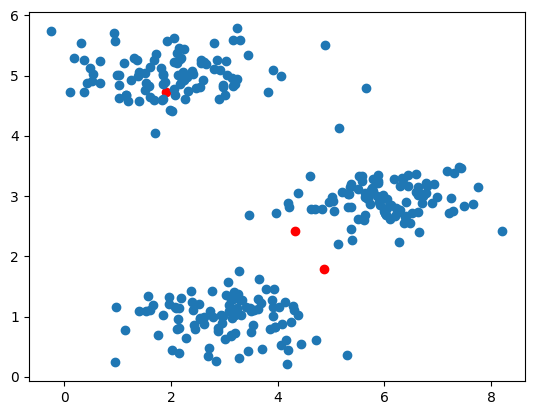

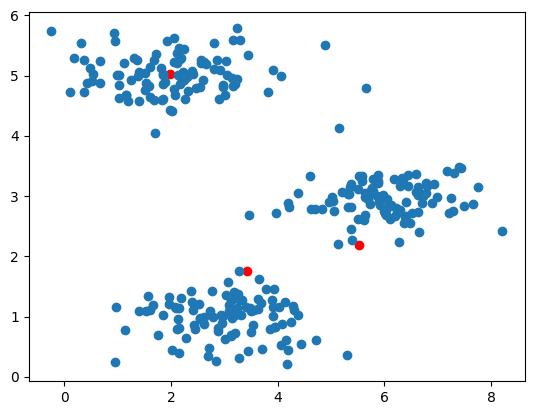

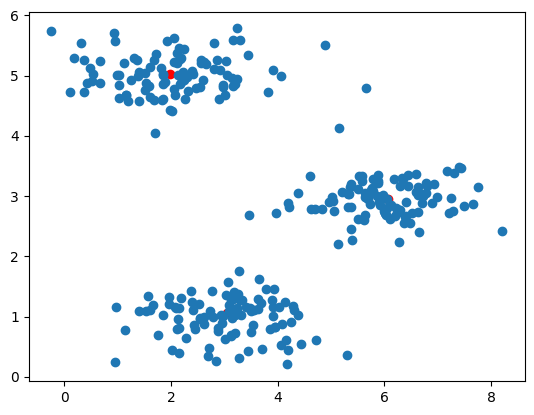

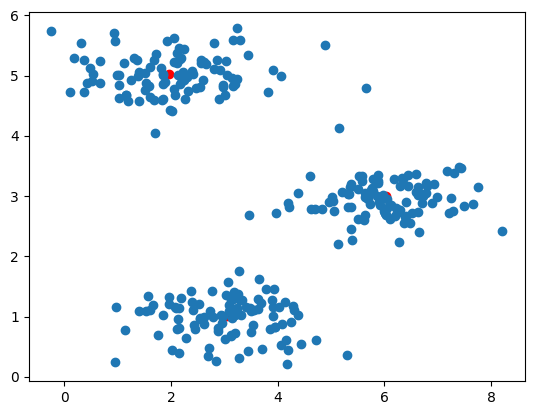

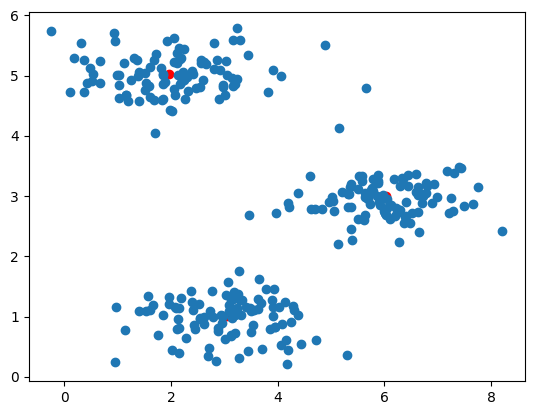

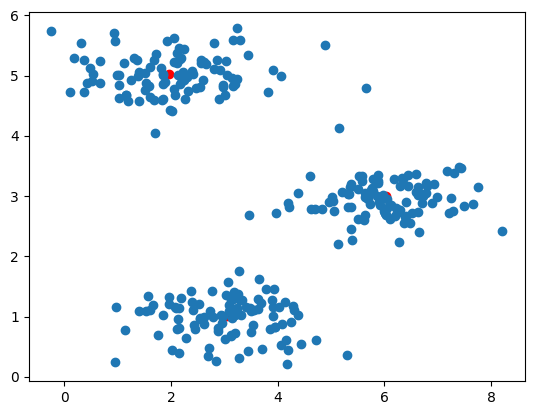

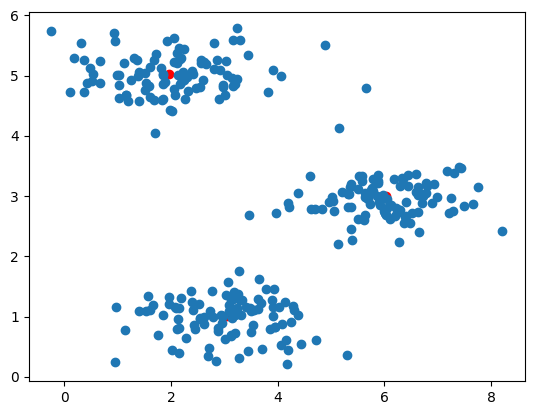

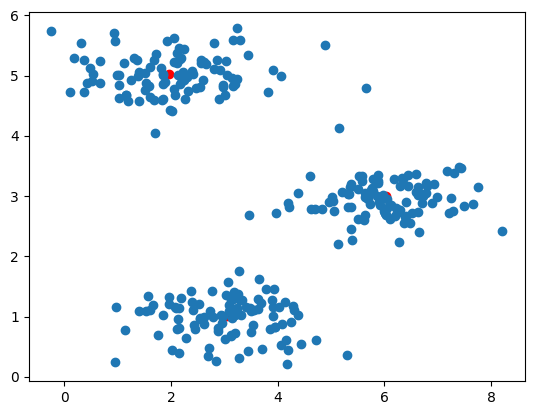

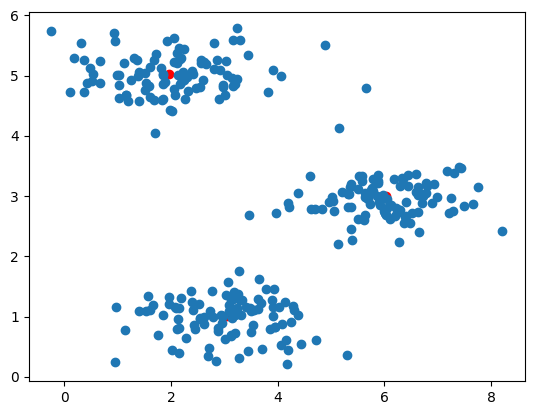

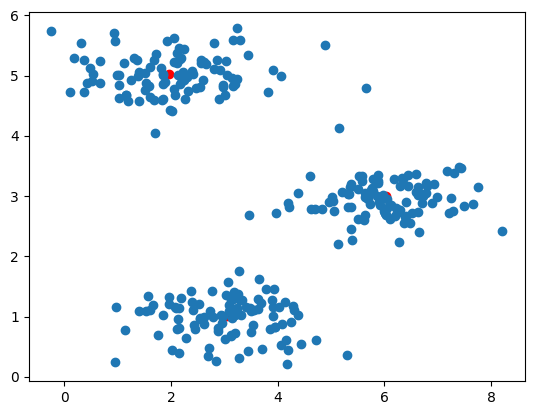

In [16]:
for i in range(10):
  obs_cen=findclosestcentroid(centroids,X)
  centroids=new_centroid(obs_cen,X)
  plt.figure()
  plt.scatter(np.array(centroids)[:,0],np.array(centroids)[:,1],color='red')
  plt.scatter(X[:,0],X[:,1])
  plt.show()

In [17]:
centroids

[0    6.033667
 1    3.000525
 dtype: float64,
 0    1.953995
 1    5.025570
 dtype: float64,
 0    3.043671
 1    1.015410
 dtype: float64]

In [2]:
#Image compression
import cv2
img=cv2.imread("/content/Tom.jpg")
img.shape

(200, 200, 3)

In [3]:
im = (img/255).reshape(200*200,3)

In [4]:
#initialize centroids
import random
init_centroids = random.sample(range(0,len(im)),6)

In [29]:
#centroids=[]
#for i in init_centroids:
  #centroids.append(im[i])
#centroids
init_centroids = random.sample(range(0, len(im)), 6)
centroids = np.array([im[i] for i in init_centroids], dtype=float)  # shape (6,3)

In [19]:
def calc_dist(x1,x2):
  return (sum((x1-x2)**2))**0.5

In [20]:
def findclosestcentroid(centroid,X):
  assigned_centroid=[]
  for i in X:
    distance=[]
    for j in centroid:
      distance.append(calc_dist(i,j))
    assigned_centroid.append(np.argmin(distance))
  return assigned_centroid

In [21]:
def new_centroid(centroid,X):
  new_centroids=[]
  new_df=pd.concat([pd.DataFrame(X),
                    pd.DataFrame(centroid,columns=['centroid'])],axis=1)
  for c in set(new_df['centroid']):
    current_cluster=new_df[new_df['centroid']==c][new_df.columns[:-1]]
    new_mean = current_cluster.mean(axis=0)
    new_centroids.append(new_mean)
  return new_centroids

In [30]:
print("img.shape:", img.shape)
print("im.shape:", im.shape)
print("X.shape:", X.shape if 'X' in locals() else 'X not yet defined')
X=np.array(im)
for i in range(10):
  obs_cen=findclosestcentroid(centroids,X)
  centroids=new_centroid(obs_cen,X)

img.shape: (200, 200, 3)
im.shape: (40000, 3)
X.shape: (40000, 3)


In [36]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2

In [32]:
H, W = img.shape[:2]              # original dimensions
obs_cen = np.asarray(obs_cen)     # ensure NumPy array
centroids = np.asarray(centroids) # ensure NumPy array (k,3)

# Map each pixel to its centroid
clustered_flat = centroids[obs_cen]   # shape (H*W, 3)
clustered_img  = clustered_flat.reshape(H, W, 3)

# Scale if values are 0–1
if clustered_img.max() <= 1.0:
    clustered_img = (clustered_img * 255).astype(np.uint8)


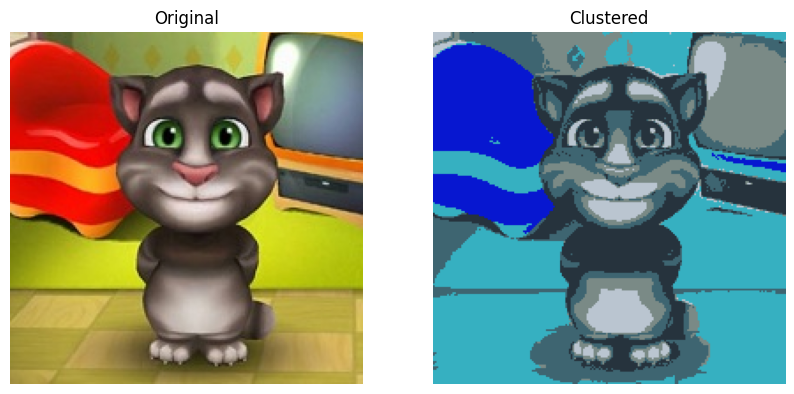

In [34]:
orig_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(orig_rgb)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Clustered")
plt.imshow(clustered_img)
plt.axis("off")

plt.show()

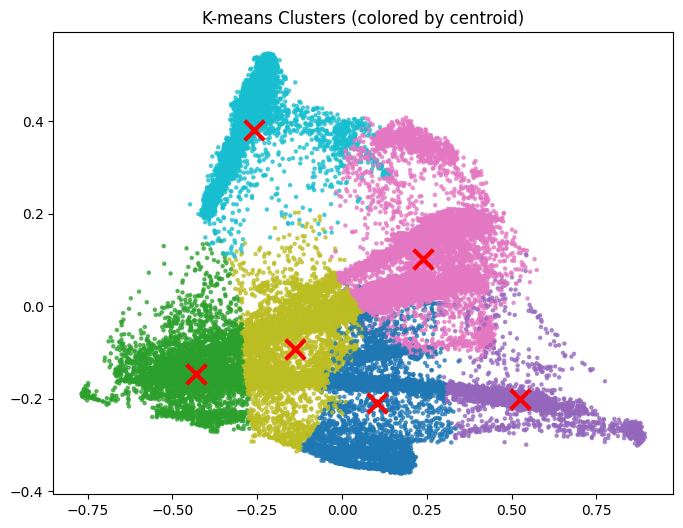

In [37]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)
plt.figure(figsize=(8,6))

# scatter with cluster-based colors
plt.scatter(X_2d[:,0], X_2d[:,1], c=obs_cen, cmap="tab10", s=5, alpha=0.7)

# also plot centroids (transformed into PCA space)
centroids_2d = pca.transform(centroids)
plt.scatter(centroids_2d[:,0], centroids_2d[:,1], c="red", marker="x", s=200, linewidths=3)

plt.title("K-means Clusters (colored by centroid)")
plt.show()

In [ ]:
#display the color of ths pixel correspondent to its centroid
#apply the same process to your own photo